# Определение наиболее выгодного региона нефтедобычи

## Задача 
Заказчиком является нефтедобывающая компания. 

Необходимо подготовить модель машинного обучения, которая поможет определить регион, где добыча принесет наибольшую прибыль. 

Также необходимо оценить возможную прибыль и риски.

## Данные

В распоряжении имеем пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 

Данные находятся в трех файлах:
* geo_data_0.csv
* geo_data_1.csv
* geo_data_2.csv

## Описание признаков

* **id** — уникальный идентификатор скважины;
* **f0, f1, f2** — три признака точек (признаки значимы);
* **product** — объём запасов в скважине (тыс. баррелей).

## Условия и ограничения
* необходимо использовать линейную регрессию
* при разведке региона исследуют 500 точек, из которых с помощью ML отбирают 200 лучших для разработки
* бюджет на разработку - 10 млрд. руб
* стоимость 1 барреля 450 руб
* вероятность убытков не должна превышать 2,5%

## План работы
0. Импорт библиотек

1. Подготовка данных

    1.1. Открыть и изучить данные
    
    1.2. Провести предобработку данных. Убрать или заменить пропуски, привести данные к нужным типам. Проверить на дубликаты. 
    
2. Обучение модели

    2.1. Разделение на обучающую и тестовую выборки
    
    2.2. Обучение с кроссвалидацией и предсказание
    
3. Расчет прибыли и выбор региона

    3.1. Подготовка к расчету прибыли и рисков
    
    3.2. Расчет прибыли и рисков
    
4. Вывод


    

## 0. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from scipy import stats as st


## Загрузка и подготовка данных

Регион 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331      

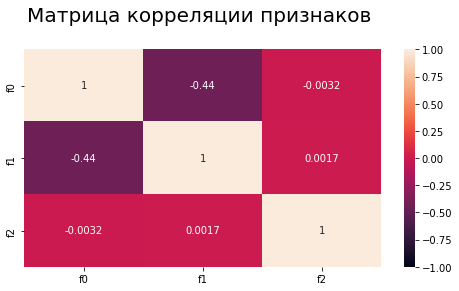

Регион 1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      

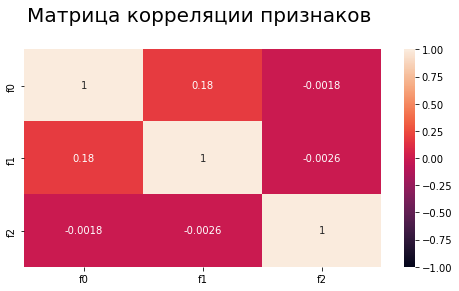

Регион 2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262      

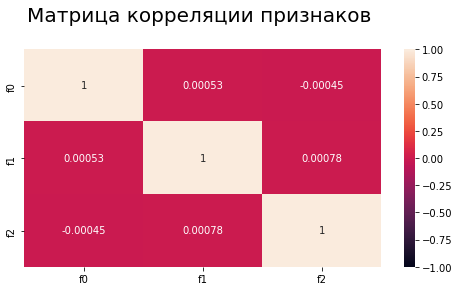

In [2]:
df=[]
df.append(pd.read_csv('datasets/geo_data_0.csv'))
df.append(pd.read_csv('datasets/geo_data_1.csv'))
df.append(pd.read_csv('datasets/geo_data_2.csv'))

for i in range(len(df)):
    print('Регион', i, '\n')
    df[i].info()
    print()
    print(df[i].describe(), '\n')
    print(df[i].head(), '\n')
    print('Количество полных дубликатов:', df[i].duplicated().sum())
    print('Количество дубликатов в id:', df[i]['id'].duplicated().sum())
    print('-------------------', '\n')
    
    plt.figure(figsize=(8,4))
    ax = plt.axes()
    sns.heatmap(
        df[i][['id', 'f0', 'f1', 'f2']].corr(),        
        annot=True, # рисует значения внутри ячеек
        vmin=-1, vmax=1,  # указывает начало цветовых кодов от -1 до 1.
        ax = ax);
    ax.set_title('Матрица корреляции признаков \n', fontsize=20)
    plt.show()


- Данные по регионам содержат по 10000 записей в каждом
- Пропуски отсутствуют
- Типы данных преобразовывать нет необходимости.
- Полных дубликатов нет, но присутствуют дубликаты в id (идентификатор скважины). Т.е. по одной и той же скважине имеем разные данные. 
- корреляции между признаками, не наблюдается ни в одном регионе - что хорошо, т.к. мы будем использовать линейную регрессию.  

Обработаем эти дубликаты.

### Обработка дубликатов

Посмотрим на дубликаты

In [3]:
for i in range(len(df)):
    duples = df[i][df[i]['id'].duplicated(keep=False)].sort_values('id')
    print('Регион ' + str(i))
    print('Дубликаты в id:')
    print(duples)
    print(f'Процент дубликатов в данных {len(duples)/len(df[i])*100:.2%}')
    print('-------------------')
    print()


Регион 0
Дубликаты в id:
          id        f0        f1         f2     product
66136  74z30  1.084962 -0.312358   6.990771  127.643327
64022  74z30  0.741456  0.459229   5.153109  140.771492
51970  A5aEY -0.180335  0.935548  -2.094773   33.020205
3389   A5aEY -0.039949  0.156872   0.209861   89.249364
69163  AGS9W -0.933795  0.116194  -3.655896   19.230453
42529  AGS9W  1.454747 -0.479651   0.683380  126.370504
931    HZww2  0.755284  0.368511   1.863211   30.681774
7530   HZww2  1.061194 -0.373969  10.430210  158.828695
63593  QcMuo  0.635635 -0.473422   0.862670   64.578675
1949   QcMuo  0.506563 -0.323775  -2.215583   75.496502
75715  Tdehs  0.112079  0.430296   3.218993   60.964018
21426  Tdehs  0.829407  0.298807  -0.049563   96.035308
92341  TtcGQ  0.110711  1.022689   0.911381  101.318008
60140  TtcGQ  0.569276 -0.104876   6.440215   85.350186
89582  bsk9y  0.398908 -0.400253  10.122376  163.433078
97785  bsk9y  0.378429  0.005837   0.160827  160.637302
41724  bxg6G -0.823752 

Цифры совершено различные - невозможно определить какая строка верная, вероятнее всего дубликаты по id - ошибка. 

Дубликатов меньше 2% - удалим их.

In [4]:
for i in range(len(df)):
    df[i].drop_duplicates(subset=['id'], keep='first', inplace=True, ignore_index=True)
    print('Регион', i, ': количество дубликатов в id:', df[i]['id'].duplicated().sum())


Регион 0 : количество дубликатов в id: 0
Регион 1 : количество дубликатов в id: 0
Регион 2 : количество дубликатов в id: 0


## Обучение и проверка модели

### Разбиение данных на обучающую и тестовую

In [5]:
X_train = []
y_train = []
X_test = []
y_test = []

for i in range(len(df)):
    X = df[i].drop(['id','product'], axis=1)
    y = df[i]['product']
    X_train.append(None)
    y_train.append(None)
    X_test.append(None)
    y_test.append(None)

    # выделяем из данных обучающую и тестовую выборки в пропорции 75%/25%
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(
        X, y, test_size=0.25, random_state=12345)
    print(f'Регион {i}')
    print('shape X_train', X_train[i].shape)
    print('shape y_train', y_train[i].shape)
    print('shape X_test', X_test[i].shape)
    print('shape y_test', y_test[i].shape, '\n')

Регион 0
shape X_train (74992, 3)
shape y_train (74992,)
shape X_test (24998, 3)
shape y_test (24998,) 

Регион 1
shape X_train (74997, 3)
shape y_train (74997,)
shape X_test (24999, 3)
shape y_test (24999,) 

Регион 2
shape X_train (74997, 3)
shape y_train (74997,)
shape X_test (24999, 3)
shape y_test (24999,) 



### Обучение модели с кроссвалидацией и выполнение предсказаний на тестовой выборке.

In [6]:
model = []
predictions_test = []

for i in range(len(df)):
    rgr = Ridge(random_state=42)
    params={
        'alpha': np.arange(0.1, 5, 0.1)
    }
    search_cv = GridSearchCV(rgr, params, scoring='neg_root_mean_squared_error').fit(X_train[i], y_train[i])
    predictions_test.append(pd.Series(search_cv.predict(X_test[i]), index=y_test[i].index))
    print('Регион', i)
    print(f'Cредний запас предсказанного сырья {predictions_test[i].mean():.2f}')
    print(f'RMSE модели линейной регрессии на кроссвалидации: {-search_cv.best_score_:.2f}')
    print('RMSE модели линейной регрессии на тестовой выборке:', 
          f'{mean_squared_error(predictions_test[i], y_test[i])**0.5:.2f}')
    print('Параметры модели:', search_cv.best_estimator_, '\n')
    model.append(search_cv)


Регион 0
Cредний запас предсказанного сырья 92.79
RMSE модели линейной регрессии на кроссвалидации: 37.64
RMSE модели линейной регрессии на тестовой выборке: 37.85
Параметры модели: Ridge(alpha=4.9, random_state=42) 

Регион 1
Cредний запас предсказанного сырья 69.18
RMSE модели линейной регрессии на кроссвалидации: 0.89
RMSE модели линейной регрессии на тестовой выборке: 0.89
Параметры модели: Ridge(alpha=0.1, random_state=42) 

Регион 2
Cредний запас предсказанного сырья 94.87
RMSE модели линейной регрессии на кроссвалидации: 40.05
RMSE модели линейной регрессии на тестовой выборке: 40.08
Параметры модели: Ridge(alpha=4.9, random_state=42) 



### Вывод

Средние запасы на скважину в регионе 0 и регионе 2 по прогнозу составляют 92,79 тыс.баррелей и 94.87 тыс.баррелей соответственно и существенно больше чем в регионе 1: 69,18 тыс.баррелей. При этом ошибка RMSE у моделей по регионам 0 и 2 значительная 37,85 и 40,08 соответственно, а по региону 2 - незначительная 0,89.

## Подготовка к расчёту прибыли

In [7]:
N_TTL = 500                   # общее количесто исследуемых скважин для бутстрепа
N = 200                       # количество лучших скважин, отбираемых с помощью ML, для разработки
BUDGET = 10_000_000_000       # бюджет на разработку скважин в регионе
REVENUE_PER_ITEM = 450_000    # доход с тысячи баррелей, руб
budget_per_well = BUDGET/N    # средний бюджет на скважину
product_per_well = budget_per_well / REVENUE_PER_ITEM # среднее количество сырья для безубыточно разработки новой скважины

print(f'Cреднее количество сырья для безубыточной разработки новой скважины {product_per_well:.2f}')


Cреднее количество сырья для безубыточной разработки новой скважины 111.11


### Выводы по подготовке к расчету прибыли

Cреднее количество сырья для безубыточной разработки новой скважины 111.11, что больше среднего запаса по скважинам во всех регионах. Таким образом есть риск получения убытков

## Расчёт прибыли и рисков 

In [8]:
# функция для расчета прибыли по выбранным скважинам и предсказаниям модели
def revenue(target, predictions, count):
    pred_sorted = predictions.sort_values(ascending=False)
    selected_wells = target[pred_sorted.index][0:count]
    return selected_wells.sum()*REVENUE_PER_ITEM - BUDGET

In [9]:
state = np.random.RandomState(12345)
    
revenues = []
for i in range(len(df)):
    revenues.append([])
    for j in range(1000):
        target_subsample = y_test[i].sample(n=N_TTL, replace=True, random_state=state)
        predictions_subsample = predictions_test[i][target_subsample.index]
        revenues[i].append(revenue(target_subsample, predictions_subsample, N))
    revenues[i] = pd.Series(revenues[i])
    print('Регион', i)
    print(f'Средняя прибыль, {revenues[i].mean():.2f}')
    q_lower = revenues[i].quantile(0.025)
    q_upper = revenues[i].quantile(0.975)
    print(f'95% доверительный интервал: ({q_lower:.2f} , {q_upper:.2f})')
    risk = revenues[i][revenues[i]<0].count() / len(revenues[i])
    print('Риск получения убытков', risk)
    print()

Регион 0
Средняя прибыль, 409491246.69
95% доверительный интервал: (-131536028.70 , 944395582.75)
Риск получения убытков 0.071

Регион 1
Средняя прибыль, 536400199.44
95% доверительный интервал: (112954247.12 , 998504156.65)
Риск получения убытков 0.003

Регион 2
Средняя прибыль, 339478034.20
95% доверительный интервал: (-224089221.74 , 847067587.69)
Риск получения убытков 0.118



## Вывод 

В результате получили следующие данные:

Регион 0
- Средняя прибыль 409 428 038.62
- 95% доверительный интервал: ( -131 536 028.70 , 944 395 582.75 )
- Риск получения убытков 0.071

Регион 1
- Средняя прибыль 536 400 199.44
- 95% доверительный интервал: ( 112 954 247.12 , 998 504 156.64 )
- Риск получения убытков 0.003

Регион 2
- Средняя прибыль 339 478 034.20
- 95% доверительный интервал: ( -224 089 221.74 , 847 067 587.68 )
- Риск получения убытков 0.118

**Оптимальным выбором является регион 1 в связи с тем, что в нем наибольшая прибыль, риск убытков минимален, а также с 95% вероятностью прибыль составит от 112,954 млн до 998,504 млн, в отличии от других регионов где в 95% доверительном интервале встречаются и убытки.**